<a href="https://colab.research.google.com/github/jayantsachdeva07/Kaggle_hearts/blob/main/Kaggle_Hearts_Multi%20classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import svm



In [104]:
df=pd.read_csv('/content/sample_data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [105]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [106]:
df.columns
X=df.drop('target',axis=1)
y=df['target']
X.columns
score=[]


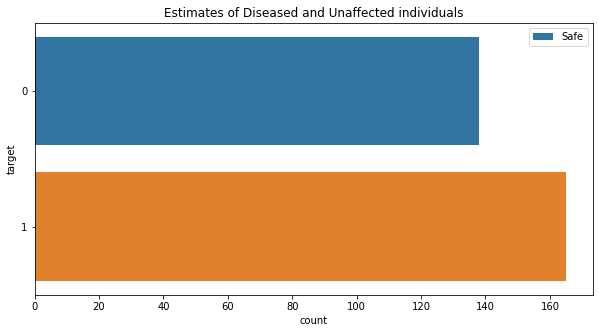

In [107]:
plt.figure(figsize=(10,5))
sns.countplot(y=y)
plt.title('Estimates of Diseased and Unaffected individuals')
plt.legend(["Safe", "Have Disease"])

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=5)

KNN

In [109]:
model_kNN=KNeighborsClassifier()
model_kNN.fit(X_train,y_train)
prediction_kNN=model_kNN.predict(X_test)
s1=accuracy_score(y_test,prediction_kNN)
print(s1)
score.append(s1*100)

0.639344262295082


Logistic Regression

In [110]:
model_LR=LogisticRegression()
model_LR.fit(X_train,y_train)
predict_LR=model_LR.predict(X_test)
s1=accuracy_score(y_test,predict_LR)
print(s1)
score.append(s1*100)

0.9180327868852459


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SVM

In [111]:
model_svm=svm.SVC()
model_svm.fit(X_train,y_train)
predict_svm=model_rf.predict(X_test)
s1=accuracy_score(y_test,predict_svm)
print(s1)
score.append(s1*100)

0.8852459016393442


XG Boost

In [112]:
model_XG=XGBClassifier()
model_XG.fit(X_train,y_train)
predict_XG=model_XG.predict(X_test)
s1=accuracy_score(y_test,predict_XG)
print(s1)
score.append(s1*100)

0.8524590163934426


Random forest

In [113]:
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)
predict_rf=model_rf.predict(X_test)
s1=accuracy_score(y_test,predict_rf)
print(s1)
score.append(s1*100)

0.8852459016393442


In [114]:
model_DT=DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
predict_DT=model_DT.predict(X_test)
s1=accuracy_score(y_test,predict_DT)
print(s1)
score.append(s1*100)

0.8688524590163934


Comparison in graph

In [115]:
print(score)

[63.934426229508205, 91.80327868852459, 88.52459016393442, 85.24590163934425, 88.52459016393442, 86.88524590163934]


KNN                       63.934426
LogisticRegression        91.803279
SVM                       88.524590
XGB                       85.245902
RandomForest              88.524590
DecisionTreeClassifier    86.885246
dtype: float64


Text(0.5, 1.0, 'Models Accuracy Scores')

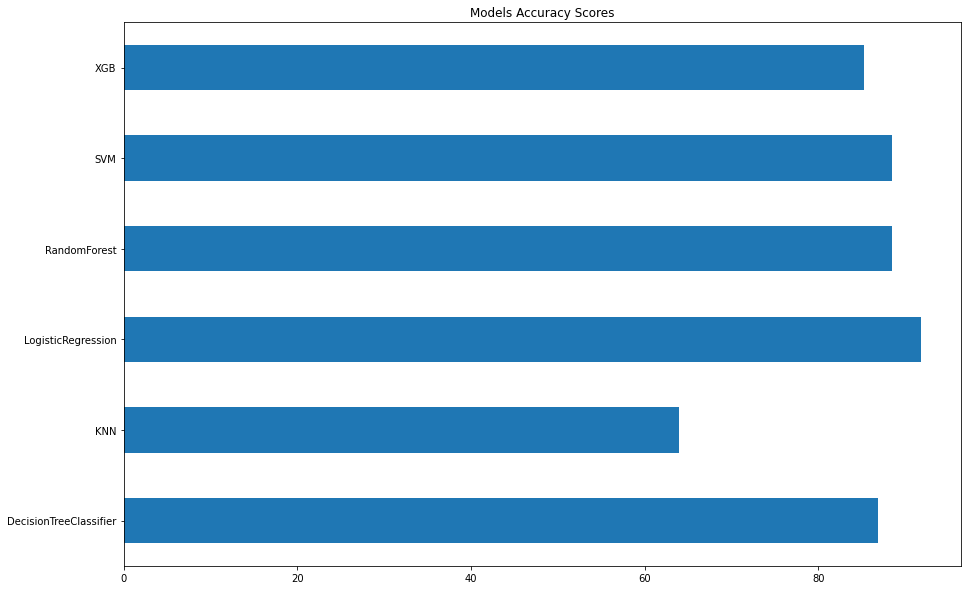

In [116]:
label = ['KNN','LogisticRegression','SVM',  'XGB', 'RandomForest',  'DecisionTreeClassifier']
score = pd.Series(data = score, index = label)
print(score)
sc = score.sort_index()
plt.figure(figsize=(15,10))
sc.plot(kind='barh')
plt.title('Models Accuracy Scores')